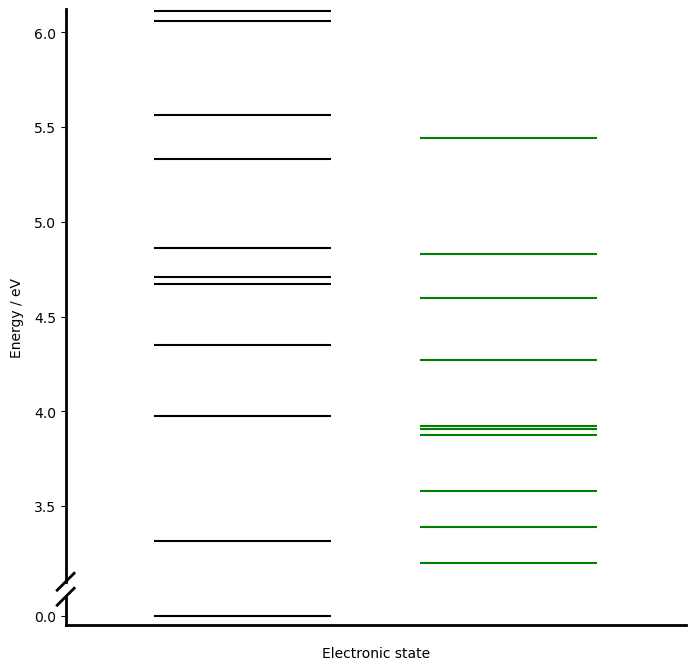

In [8]:
"""
 @author Le Nhan Pham
 @website https://lenhanpham.github.io/
 @create date 2023-02-01 18:10:21
 @modify date 2023-02-01 18:10:21
"""



import matplotlib.pyplot as plt
from brokenaxes import brokenaxes


def extractData2files(tdFile,):
    """
    This function is used when TDDFT runs for singlet and triplet separately
    """
    ss = 'Excitation energies and oscillator strengths'
    with open(tdFile, 'r') as f:
        numSstates = 0
        numTstates = 0
        Senergies, Sstates, Tenergies, Tstates = [], [], [], []
        for line in f:
            if 'Excited State' in line:
                    tempState = line.split()[3].split("-")[0]
                    tempEnergy =float(line.split()[4])
                    if str(tempState) == "Singlet":
                        Senergies.append(tempEnergy)
                        numSstates += 1 
                        Sstates.append(numSstates)
                    elif str(tempState) == "Triplet":
                        Tenergies.append(tempEnergy)
                        numTstates += 1
                        Tstates.append(numTstates)


        if str(tempState) == "Singlet":
            return Sstates, Senergies
        else:
            return Tstates, Tenergies


output="EDA-Jablonski-diagram"
singletLog ='EDA-singlet'
tripletLog ='EDA-triplets'            

singletStates, singletEnergies = extractData2files(singletLog+".log")
tripletStates, tripletEnergies = extractData2files(tripletLog+".log") 

for i in range(len(singletStates)):
    singletStates[i] = 2

for j in range(len(tripletStates)):
    tripletStates[j] = 5 


fig = plt.figure(figsize=(8,8))



n = 10
baxes = brokenaxes(ylims=((-0.05,0.1),(min(singletEnergies[0:n] + tripletEnergies[0:n])-0.1,max(singletEnergies[0:n] + tripletEnergies[0:n])+0.01)), hspace=0.05)
#baxes.scatter(singletStates[0:n], singletEnergies[0:n])
#baxes.scatter(tripletStates[0:n], tripletEnergies[0:n], )
baxes.set_ylabel("Energy / eV")
baxes.set_xlabel("Electronic state")
baxes.set_xlim([0,7])
for i in range(n):
    baxes.hlines(singletEnergies[i], 1, 3, 'k')
    baxes.hlines(tripletEnergies[i], 4, 6, 'g')
baxes.hlines(0, 1, 3, 'k')
baxes.axs[1].xaxis.set_ticks([], minor=False)
#baxes.axs[1].xaxis.set_tick_params(width=10)
#baxes.axs[0].yaxis.set_tick_params(width=10)
plt.rcParams['axes.linewidth'] = 2

plt.savefig(output + '.pdf')
plt.savefig(output + '.svg')